In [1]:
import networkx as nx

### Test

In [22]:
G = nx.Graph().to_undirected()
G.add_edges_from([  ('A', 'B'),
                    ('B', 'C'), ('B', 'D'), ('B', 'E'),
                    ('D', 'F'), ('D', 'G'), ('D', 'E'),
                    ('E', 'G'), ('E', 'H'),
                    ('G', 'F'), ('G', 'H')
                ])

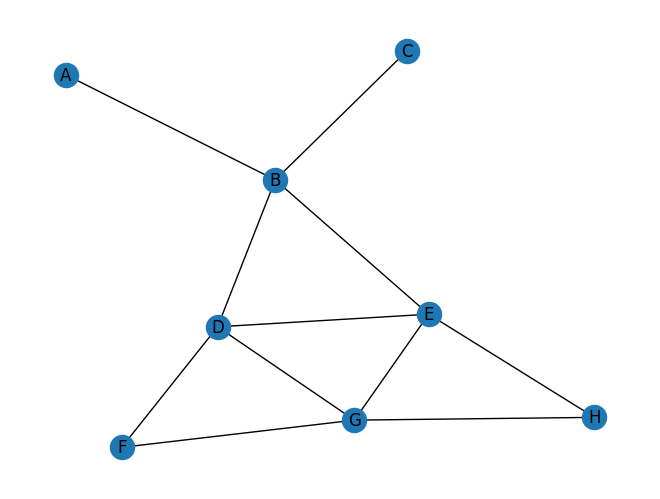

In [28]:
nx.draw(G, with_labels=True)

In [46]:
x = 10
n = x
graph = nx.Graph()
graph.add_node('A')
for node, edges in nx.bfs_successors(G, 'A'):
    print('======================================================')
    for edge in edges:
        if n == 0:
            print(x - n, ' -- ', node, ' : ', graph.nodes())
            break
        graph.add_edge(node, edge)
        n -= 1
        print(x - n, ' -- ', node, ' : ', graph.nodes())
print('======================================================')

1  --  A  :  ['A', 'B']
2  --  B  :  ['A', 'B', 'C']
3  --  B  :  ['A', 'B', 'C', 'D']
4  --  B  :  ['A', 'B', 'C', 'D', 'E']
5  --  D  :  ['A', 'B', 'C', 'D', 'E', 'F']
6  --  D  :  ['A', 'B', 'C', 'D', 'E', 'F', 'G']
7  --  E  :  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']


### Load Data

In [489]:
re_citHep = nx.read_edgelist("../datasets/cit-HepTh/re_cit-Hep.tsv", create_using=nx.DiGraph())
citHep = nx.read_edgelist("../datasets/cit-HepTh/cit-Hep.tsv", create_using=nx.DiGraph())
catHep = nx.read_edgelist("../datasets/cit-HepTh/ca-HepTh.tsv", create_using=nx.DiGraph())
enroen = nx.read_edgelist("../datasets/enron/email-Enron.tsv", create_using=nx.DiGraph())

### Vertext Queries

In [494]:
def vertex_refinement_queries(g, k):
    k -= 2
    queries_dict = {}
    if k >= 0:
        k+=1
        for start in g.nodes():
            nodes_list = [start]
            nodeNeighbors = []
            degree_list = []
            for k_limit in range(k):
                for node in nodes_list:
                    for n in g.neighbors(node):
                        if n not in nodeNeighbors:
                            nodeNeighbors.append(n)
                            degree_list = sorted([nx.degree(g, node) for node in nodeNeighbors])
                if k_limit == k-1:
                    queries_dict[start] = degree_list
                    break
                # print(degree_list)
                nodes_list = nodeNeighbors
                nodeNeighbors = []
                degree_list = []
    elif k == -2:
        for key in g.nodes():
            queries_dict[key] = [key]
        return queries_dict, 0
    elif k == -1:
        for key in g.nodes():
            queries_dict[key] = [nx.degree(g, key)]
    sum = 0
    for key in queries_dict:
        sum += 1/(list(queries_dict.values()).count(queries_dict[key]))
        # print(key, ':', '%.2f' % (1/(list(queries_dict.values()).count(queries_dict[key]))*100), '%')
        # print(queries_dict[key])
    return queries_dict, sum / len(g.nodes())

#### random graph

In [495]:
nb, sum = vertex_refinement_queries(G, k = 0)
print(sum*100, '%')

0 %


In [496]:
nb, sum = vertex_refinement_queries(G, k = 1)
print(sum*100, '%')

37.5 %


In [497]:
nb, sum = vertex_refinement_queries(G, k = 2)
print(sum*100, '%')

62.5 %


In [498]:
nb, sum = vertex_refinement_queries(G, k = 3)
print(sum*100, '%')

37.5 %


In [499]:
nb, sum = vertex_refinement_queries(G, k = 4)
print(sum*100, '%')

25.0 %


#### real world graph

In [503]:
citHep_strongly = citHep.subgraph(max(nx.strongly_connected_components(citHep), key = len))

In [504]:
citHep_strongly.number_of_nodes()

7464

In [506]:
nb, sum = vertex_refinement_queries(citHep_strongly, k = 0)
print(sum)
nb, sum = vertex_refinement_queries(citHep_strongly, k = 1)
print(sum)
nb, sum = vertex_refinement_queries(citHep_strongly, k = 2)
print(sum)
# nb, sum = vertex_refinement_queries(citHep_strongly, k = 3)
# print(sum)
# nb, sum = vertex_refinement_queries(citHep_strongly, k = 4)
# print(sum)

0
0.026661307609860317
0.9340836012861733


In [501]:
nb, sum = vertex_refinement_queries(catHep, k = 0)
print(sum)
nb, sum = vertex_refinement_queries(catHep, k = 1)
print(sum)
nb, sum = vertex_refinement_queries(catHep, k = 2)
print(sum)
nb, sum = vertex_refinement_queries(catHep, k = 3)
print(sum)
# nb, sum = vertex_refinement_queries(catHep, k = 4)
# print(sum)

0
0.005568492457223377
0.32641490331070944
0.38463096081809744


In [484]:
enron_strongly = citHep.subgraph(max(nx.strongly_connected_components(enroen), key = len))
print(enron_strongly.number_of_nodes())
nb, sum = vertex_refinement_queries(enron_strongly, k = 0)
print(sum)
nb, sum = vertex_refinement_queries(enron_strongly, k = 1)
print(sum)

27150


### SubGraph queries

In [332]:
def bfs(g, head, facts):
    query_dict = {}
    for i in nx.bfs_successors(g, head):
        query_dict[i[0]] = i[1]
        facts -= 1
        if facts == 0:
            break
    return query_dict
    # return nx.Graph(query_dict).to_directed()

    
def subgraph_knowledge_queries(g, informations, facts):
    queries_dict = {}
    for n in g.nodes():
        subgraph_dict = bfs(g, n, facts)
        for i in subgraph_dict.keys():
            # print(i)
            if i in informations:
                if informations[i] == subgraph_dict[i]:
                    print(n)
                    print(informations[i], '==', subgraph_dict[i])
    return 

In [336]:
bfs(trueGraph, '1', 5)

{'1': ['2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '82',
  '83',
  '84'],
 '2': ['85'],
 '3': ['86', '87', '88', '89', '90', '91', '92'],
 '6': ['93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99',
  '100',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '107',
  '108',
  '109',
  '110',
  '111',
  '112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '119',
  '120',
  '121',
  '122',
  '123

In [334]:
subgraph_knowledge_queries(trueGraph, trueGraph, 5)

---

In [335]:
facts = 5
for i in nx.bfs_successors(G, '1'):
    print(i[1])
    facts -= 1
    if facts == 0:
        break

NetworkXError: The node 1 is not in the graph.

In [51]:
from sys import stderr

In [72]:
def get_subgraph(g, num_fact, start):
    graph = nx.Graph()
    graph.add_node(start)
    for node, edges in nx.bfs_successors(g, start):
        for edge in edges:
            if n == 0:
                break
            graph.add_edge(node, edge)
            n -= 1
    return graph

In [ ]:
def subgraph_knowledge_queries(g, g_real, num_fact):
    result_dict = {}
    nodes_no = len(g.nodes) * len(g_real.nodes) # 16
    i = 0

    for start in g.nodes:
        fact = get_subgraph(g, n, start)
        result_dict[start] = []
        for node in g_real.nodes:
            subgraphs = [get_subgraph(g_real, n, node)] # should instead get all possible subgraphs

            for subgraph in subgraphs:
                if nx.is_isomorphic(fact, subgraph):
                    result_dict[start].append(node)

            i += 1
            print('[{}] {:.3%}\t\r'.format(n, i/nodes_no), file=stderr, end='')

    return result_dict

In [52]:
def edge_facts_subgraph(g, g_pert, n):
    res = {}
    nodes_no = len(g.nodes) * len(g_pert.nodes) # 16
    i = 0

    for start in g.nodes:
        fact = get_subgraph(g, n, start)
        res[start] = []
        for node in g_pert.nodes:
            subgraphs = [get_subgraph(g_pert, n, node)] # should instead get all possible subgraphs

            for subgraph in subgraphs:
                if nx.is_isomorphic(fact, subgraph):
                    res[start].append(node)

            i += 1
            print('[{}] {:.3%}\t\r'.format(n, i/nodes_no), file=stderr, end='')

    return res

In [66]:
G = nx.read_edgelist("./data/cit-HepTh/cit-Hep.tsv", create_using=nx.DiGraph())

In [71]:
edge_facts_subgraph(G, G, 1)

{'1': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44'],
 '2': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44'],
 '3': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  